# Neurohackademy 2018 
By the (vastly oversimplifed) numbers

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from hacktrack import get_project_info, PROJECT_LIST
import hacktrack.plotting as plothacks
sns.set(style='white', context='notebook', font_scale=1.4)
%matplotlib inline

# basic settings
since = '2018-08-05'  # the start of Neurohackademy 2018!!

## Getting the stats

We'll use `PROJECT_LIST` (which is a csv file that I curated 2018-08-09 during our pizza dinner) that lists the `user` and `repository` for the GitHub projects everyone is working on! 
We can specify `since` to ensure we're only looking at these projects since the beginning of Neurohackademy.

In [2]:
# load all the commit and issue information
commits, issues = get_project_info(PROJECT_LIST, since=since)

Getting commit and issue information for miykael/mni_atlas_reader
Getting commit and issue information for miykael/parcellation_fragmenter
Getting commit and issue information for npnl/pals
Getting commit and issue information for amandakeasson/tvb_nipype
Getting commit and issue information for HBClab/NiBetaSeries
Getting commit and issue information for danielmlow/brain_age
Getting commit and issue information for srcole/o-factor
Getting commit and issue information for jarodroland/ConvOuch
Getting commit and issue information for kfinc/nilearn_task_networks
Getting commit and issue information for peerherholz/bidsonym
Getting commit and issue information for mikellagreen/o-factor_webapp
Getting commit and issue information for njvack/scatterbrain
Getting commit and issue information for jcbeer/predictiveviz
Getting commit and issue information for tjlagrow/better-google
Getting commit and issue information for rosali920/neuropointillist
Getting commit and issue information for incf/

We get a _lot_ of info on commits. 
We can track `additions`, `deletions`, and `author`, which are interesting, or we can get more involved and dig into the `commit` message.
(We won't, but we can!)

In [3]:
print(commits.columns.values)

['additions' 'author' 'comments_url' 'commit' 'committer' 'date'
 'deletions' 'html_url' 'node_id' 'parents' 'project' 'sha' 'total' 'url'
 'user']


We also get a lot of information on issues!
Data on the `author`, date of creation (`created_at`), and date of closing (if it was closed; `closed_at`) are especially interesting.

In [4]:
print(issues.columns.values)

['assignee' 'assignees' 'author' 'author_association' 'body' 'closed_at'
 'comments' 'comments_url' 'created_at' 'events_url' 'html_url' 'id'
 'labels' 'labels_url' 'locked' 'milestone' 'node_id' 'number' 'project'
 'pull_request' 'repository_url' 'state' 'title' 'updated_at' 'url' 'user']


Let's see how many projects we pulled information on:

In [5]:
print("Commit information acquired from {} projects."
      .format(commits.project.unique().size))
print("Issues information acquired from {} projects."
      .format(issues.project.unique().size))

Commit information acquired from 19 projects.
Issues information acquired from 13 projects.


# MAKE IT PRETTY
These are some _very_ basic plots of the statistics.
If I'd started this earlier I would have loved to make them prettier! 
Thankfully, all this code and data is openly available for you to play around with as you like. :)

We'll start out with total commits by project:

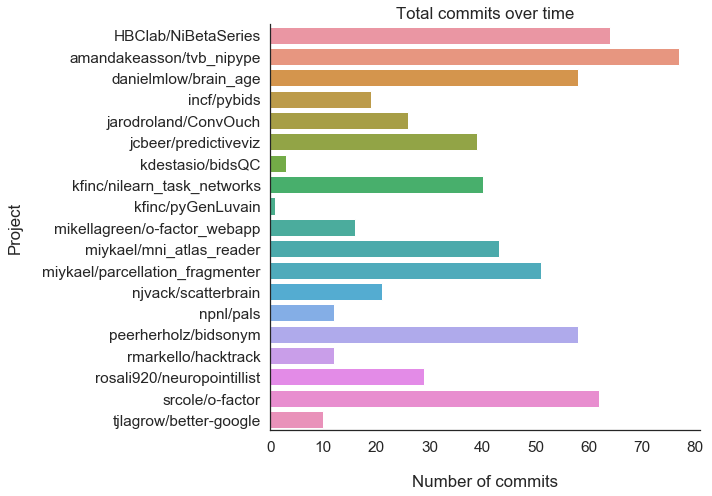

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax = plothacks.plot_commits_by_project(commits, ax=ax)

Then total commits by user:

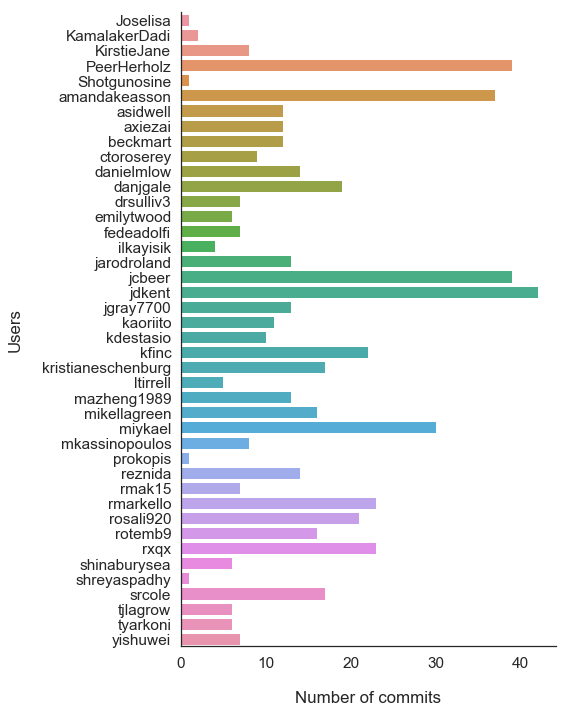

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
ax = plothacks.plot_commits_by_user(commits, ax=ax)

We can also do cumulative plots of commits over time (we only plot a few projects because it's entirely overwhelming otherwise):

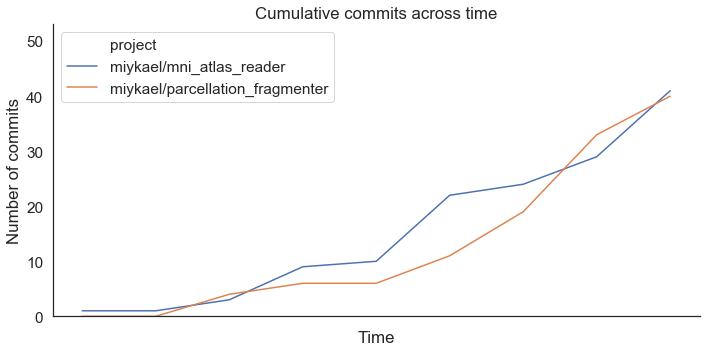

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_projects = ['miykael/mni_atlas_reader',
                 'miykael/parcellation_fragmenter']
ax = plothacks.plot_commits_by_time(commits, project=plot_projects, ax=ax)

And, finally, a **wildly** uninterpretable scatterplot of additions and deletions within a project (or set of projects!)

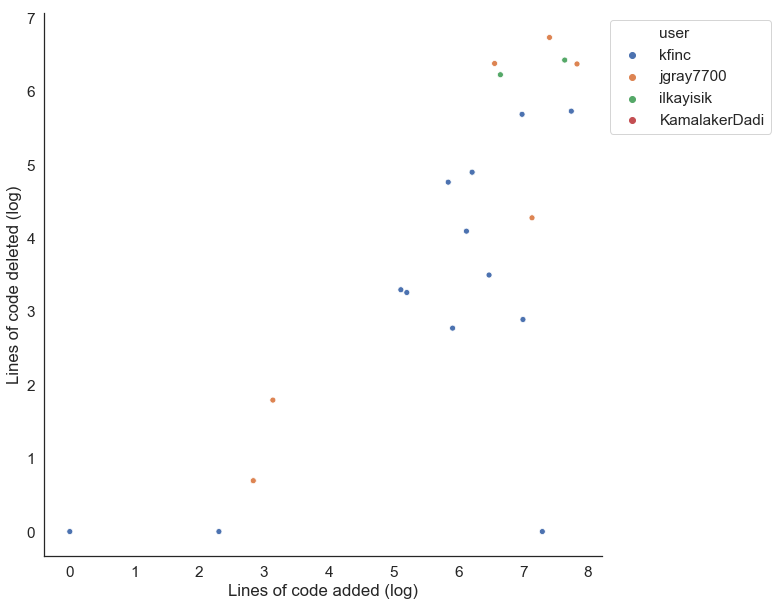

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_projects = project=['kfinc/nilearn_task_networks']
ax = plothacks.scatter_by_statistics(commits, project=plot_projects, ax=ax)

## Issues
We can also take a look at issues! 

We'll start with a stacked bar plot examining the number of issues opened and/or closed during the hack.:

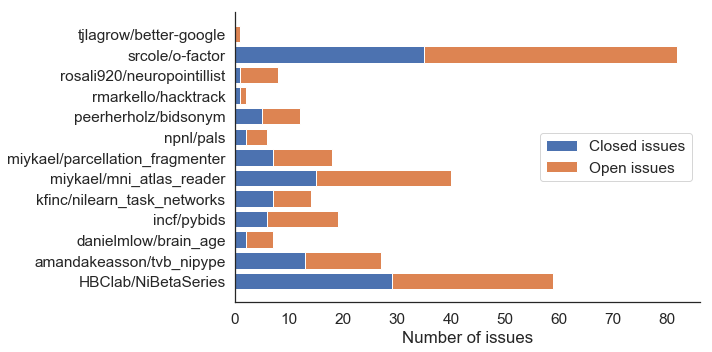

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = plothacks.plot_issues_by_project(issues, ax=ax);

We can also plot the issues as a function of time for a given project (or set of projects):

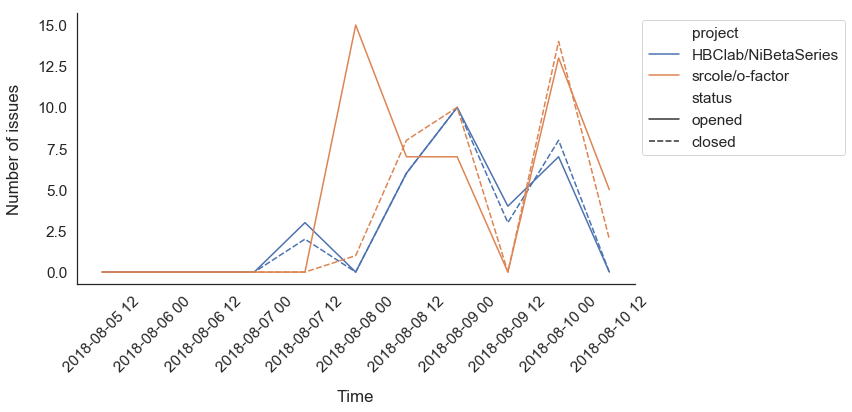

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_projects = ['srcole/o-factor',
                 'HBClab/NiBetaSeries']
ax = plothacks.plot_issues_by_time(issues, project=plot_projects, 
                                   since=since, frequency='12H', ax=ax)

I'm sure there's other stuff that you can plot but this is just a taste!